In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [31]:
import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [32]:
data = pd.read_csv('./preprocessed_data/final_data_after_winsorization.csv', index_col=0)
data.head(2)

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,총_20_30대_(수),총_40_50대_(수),총_60대이상_(수),총_10대,총_20_30대,총_40_50대,총_60대이상,유치원_초등학교_(수),유치원_초등학교,거주_유동_인구당_매출액
행정동명,,,,,,,,,,,,,,,,,,,,,
가락1동,9836,1633,2492,2706,2438,449,118,10.0,0.0,1.0,...,15010,17080,11642,0.095664,0.272572,0.310162,0.211411,3.0,0.000054,26.850496
가락2동,12375,3568,2746,2825,2641,453,142,3.0,0.0,4.0,...,17364,20426,14158,0.104766,0.277141,0.326013,0.225971,6.0,0.000096,35.834189


In [33]:
data.columns

Index(['2023년09월_전체세대', '2023년09월_1인세대', '2023년09월_2인세대', '2023년09월_3인세대',
       '2023년09월_4인세대', '2023년09월_5인세대', '2023년9월_6인가구이상', '채소가게수',
       '제로웨이스트 가게수', '유치원수', '거주인구대비취약자수', '거주인구대비취약자백분위수', '미세먼지지수',
       '미세먼지백분위', '행정구역면적', '공원수', '공원율', '도시농업(프로그램수)', '도시농업(시설수)', '초등학교수',
       '사업체수 (개)', '종사자수 (명)', '채식식당수', '인구수', '1_0대', '1_10대', '1_20대',
       '1_30대', '1_40대', '1_50대', '1_60대', '1_70대', '1_80대', '1_90대', '1_기타',
       '2_0대', '2_10대', '2_20대', '2_30대', '2_40대', '2_50대', '2_60대', '2_70대',
       '2_80대', '2_90대', '2_기타', '카페수', '승하차인원_버스_지하철', '1점포당_1년_매출액',
       '행정동별_1년_매출액', '1인세대_(수)', '1인세대', '총_10대_(수)', '총_20_30대_(수)',
       '총_40_50대_(수)', '총_60대이상_(수)', '총_10대', '총_20_30대', '총_40_50대',
       '총_60대이상', '유치원_초등학교_(수)', '유치원_초등학교', '거주_유동_인구당_매출액'],
      dtype='object')

<Axes: >

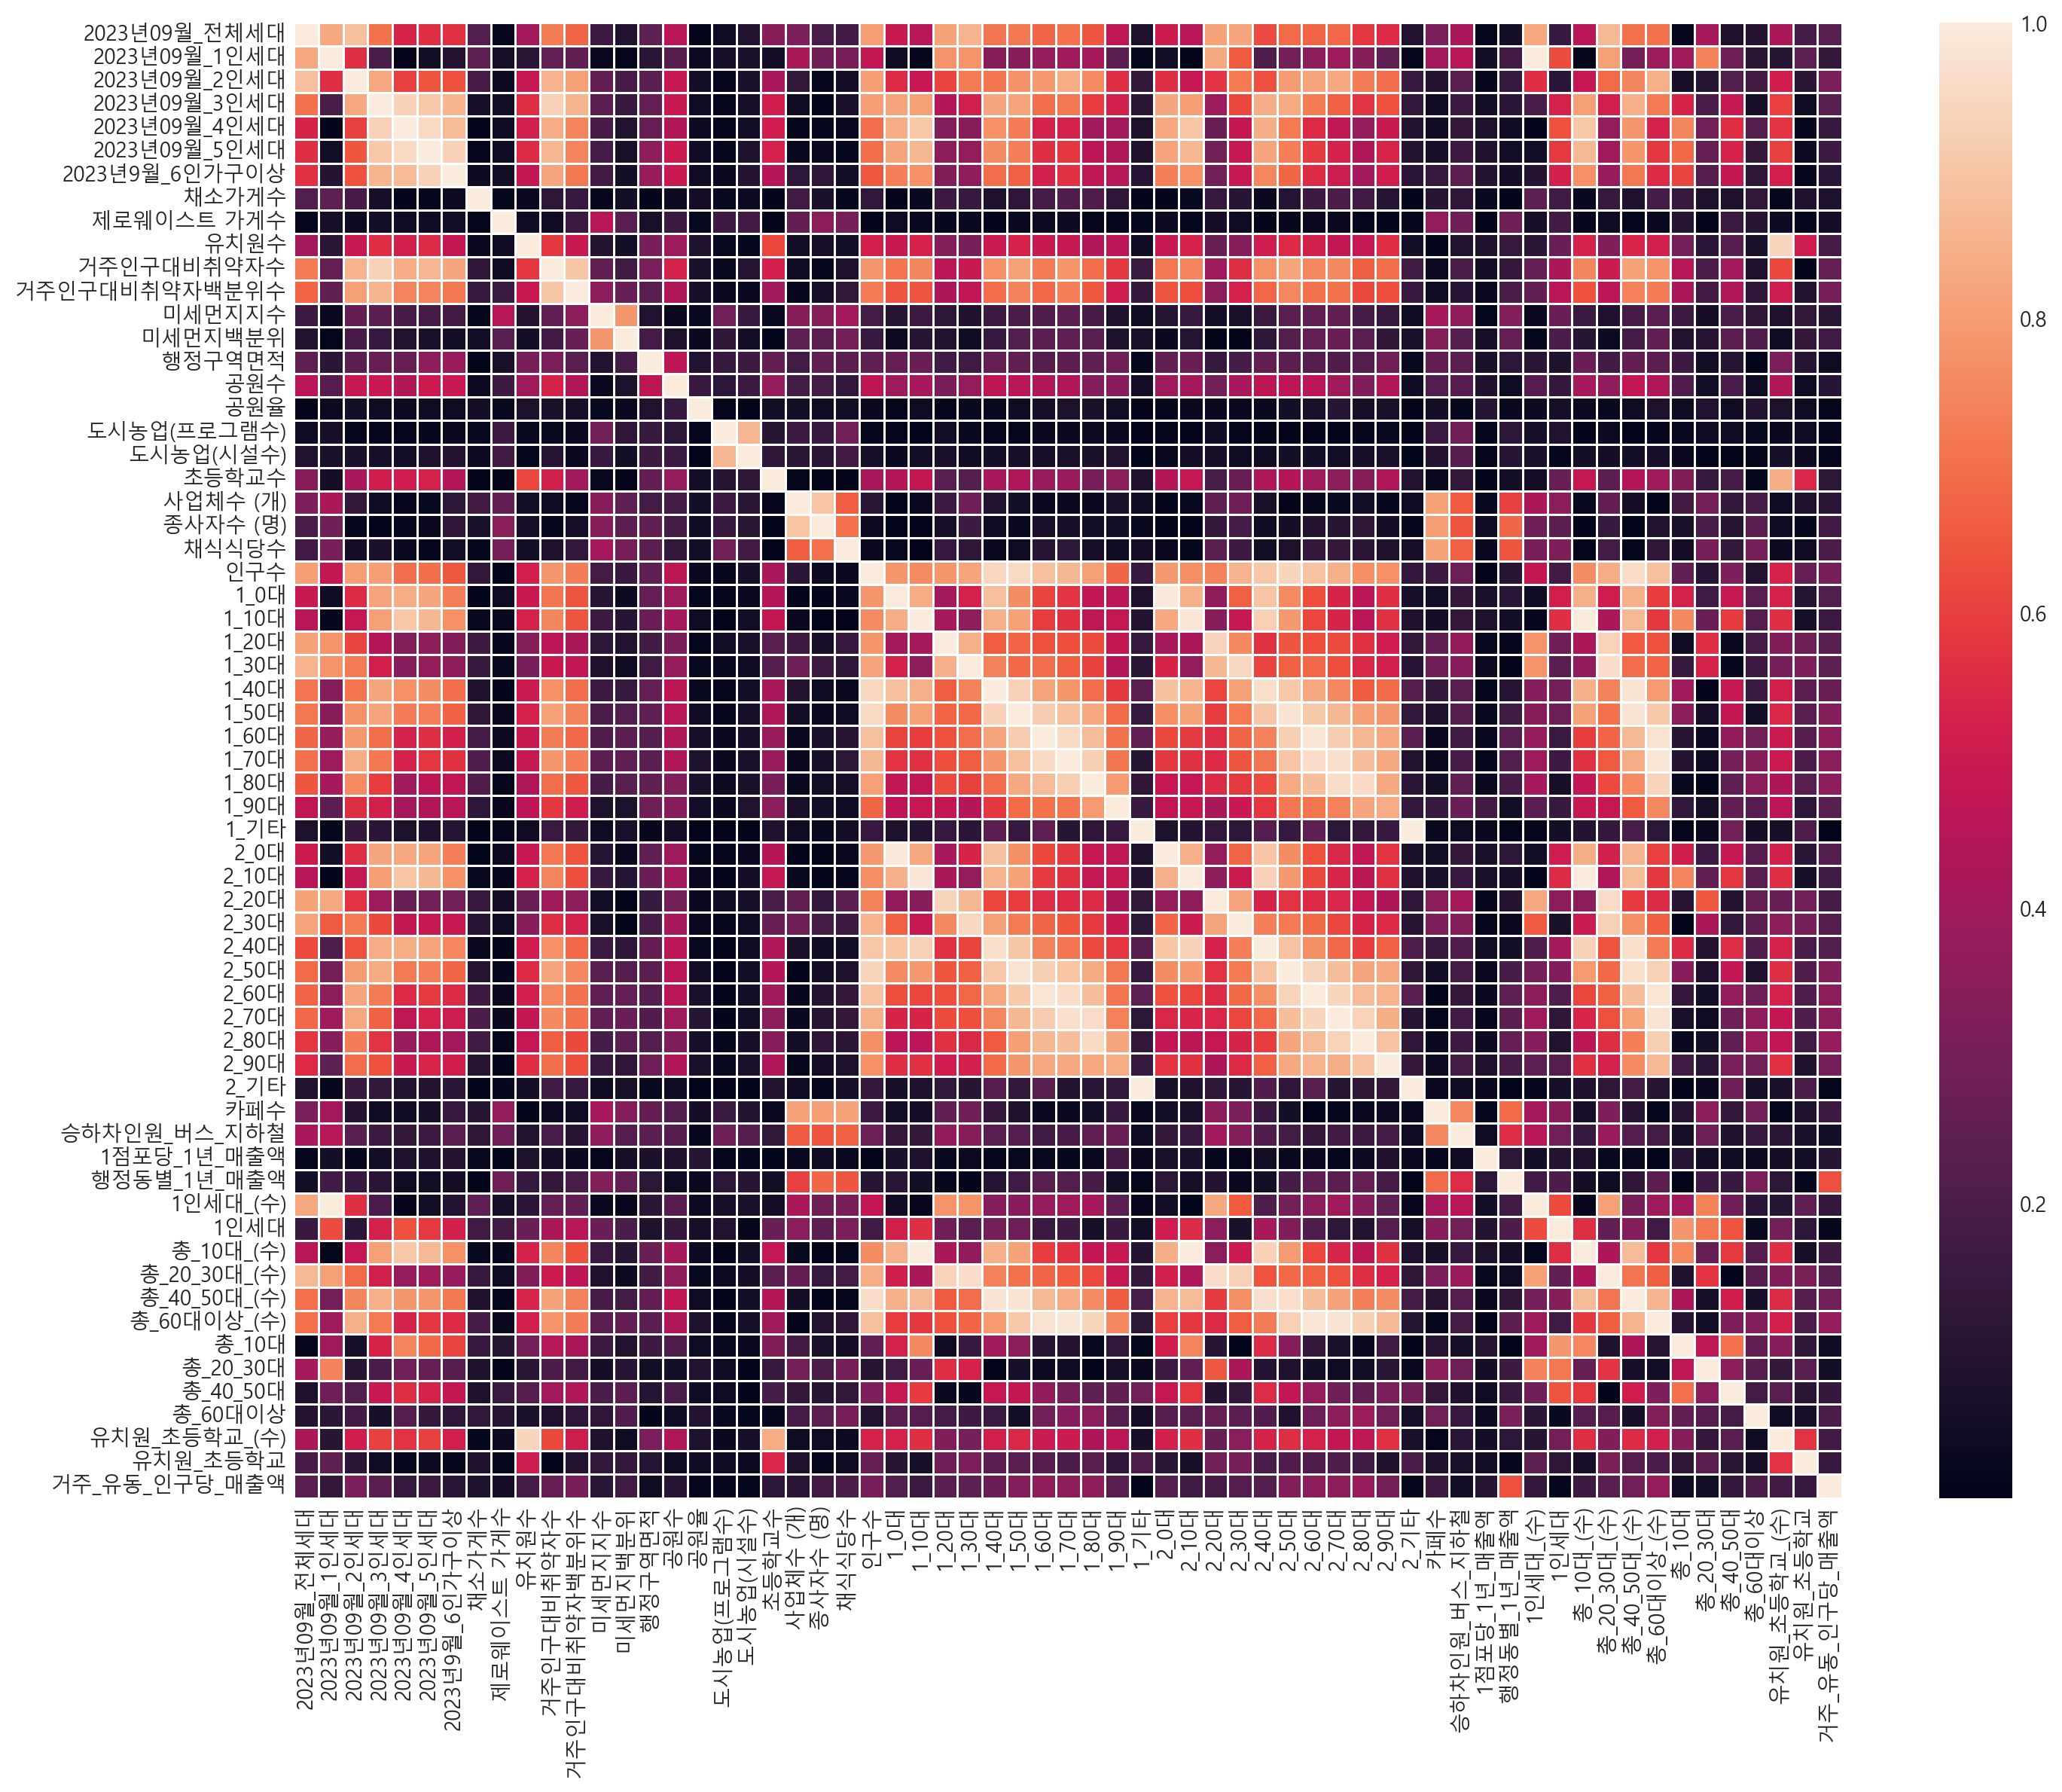

In [36]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(data.corr().apply(lambda x : abs(x)), linewidth=.5, fmt='.2f', ax=ax) #, annot=True)

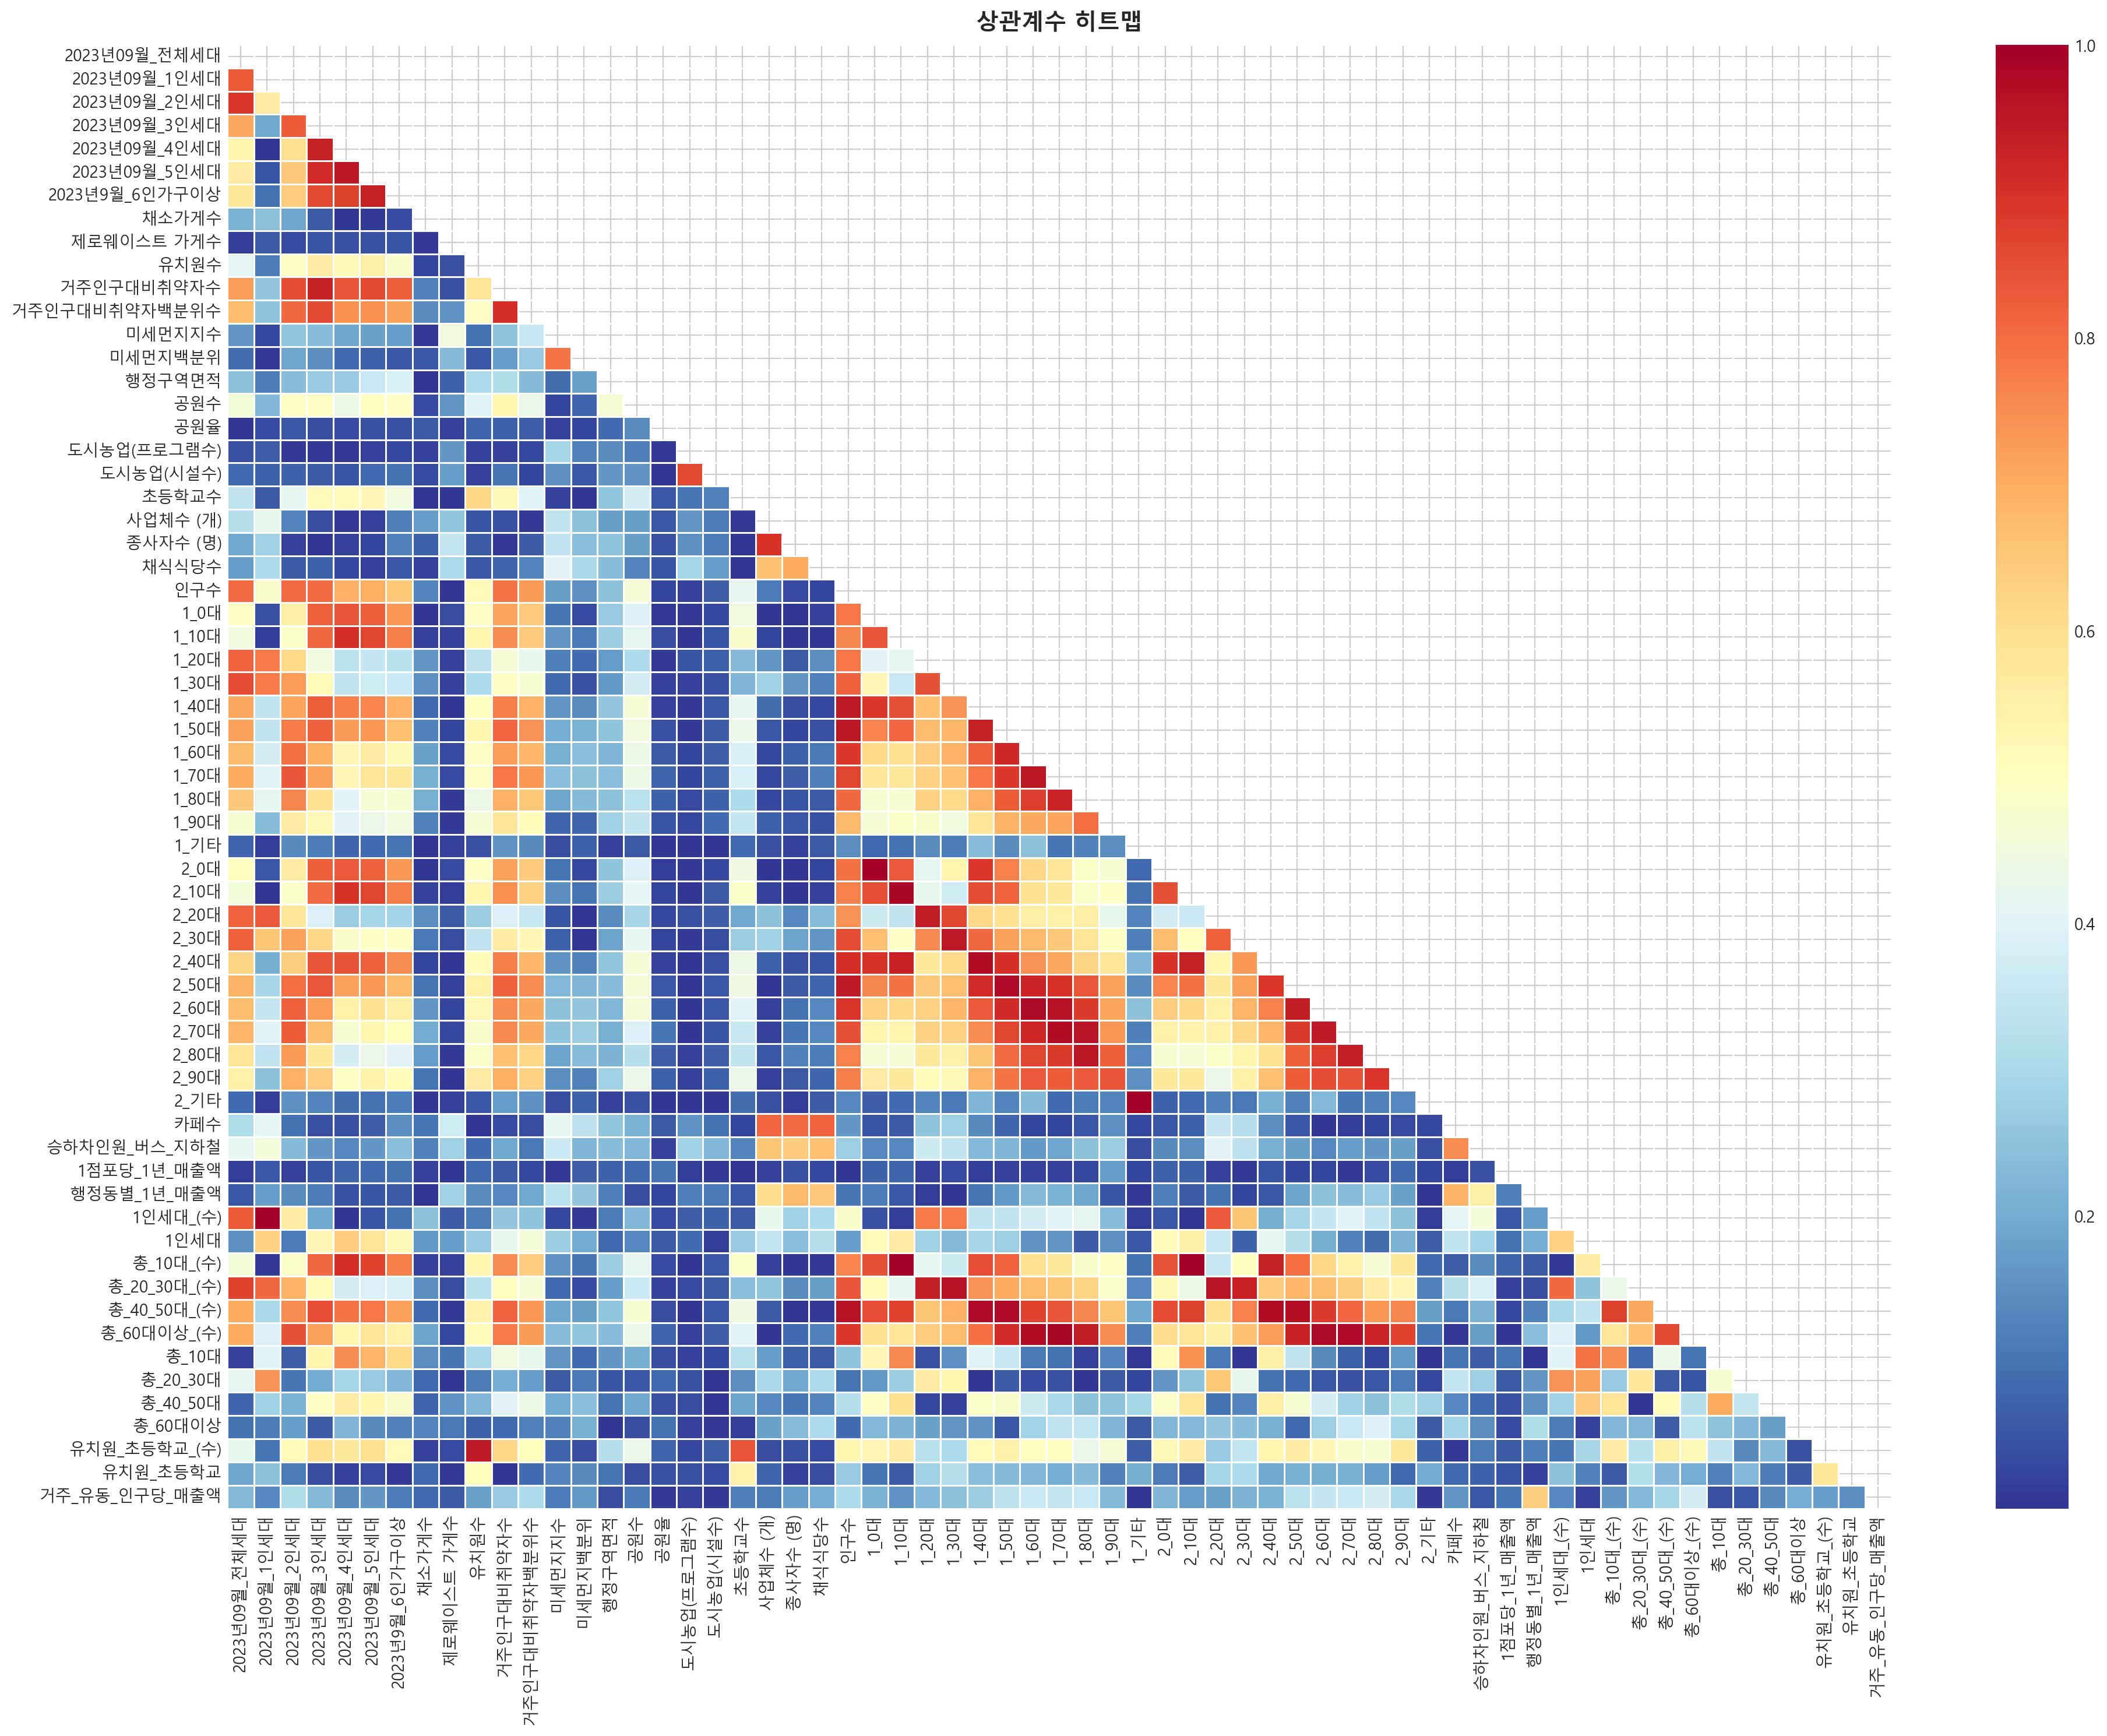

In [52]:
plt.figure(figsize = (20, 15))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(data.corr().apply(lambda x : abs(x)), dtype=bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = data.corr().apply(lambda x : abs(x)),    # 'corr' = 상관계수 테이블
            annot = False,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

In [63]:
features = ['미세먼지지수',  '공원수', '도시농업(프로그램수)','거주_유동_인구당_매출액', '채소가게수', '제로웨이스트 가게수', '승하차인원_버스_지하철', '카페수', '유치원_초등학교', '인구수', '총_10대','총_20_30대', '총_60대이상', '1인세대'] 

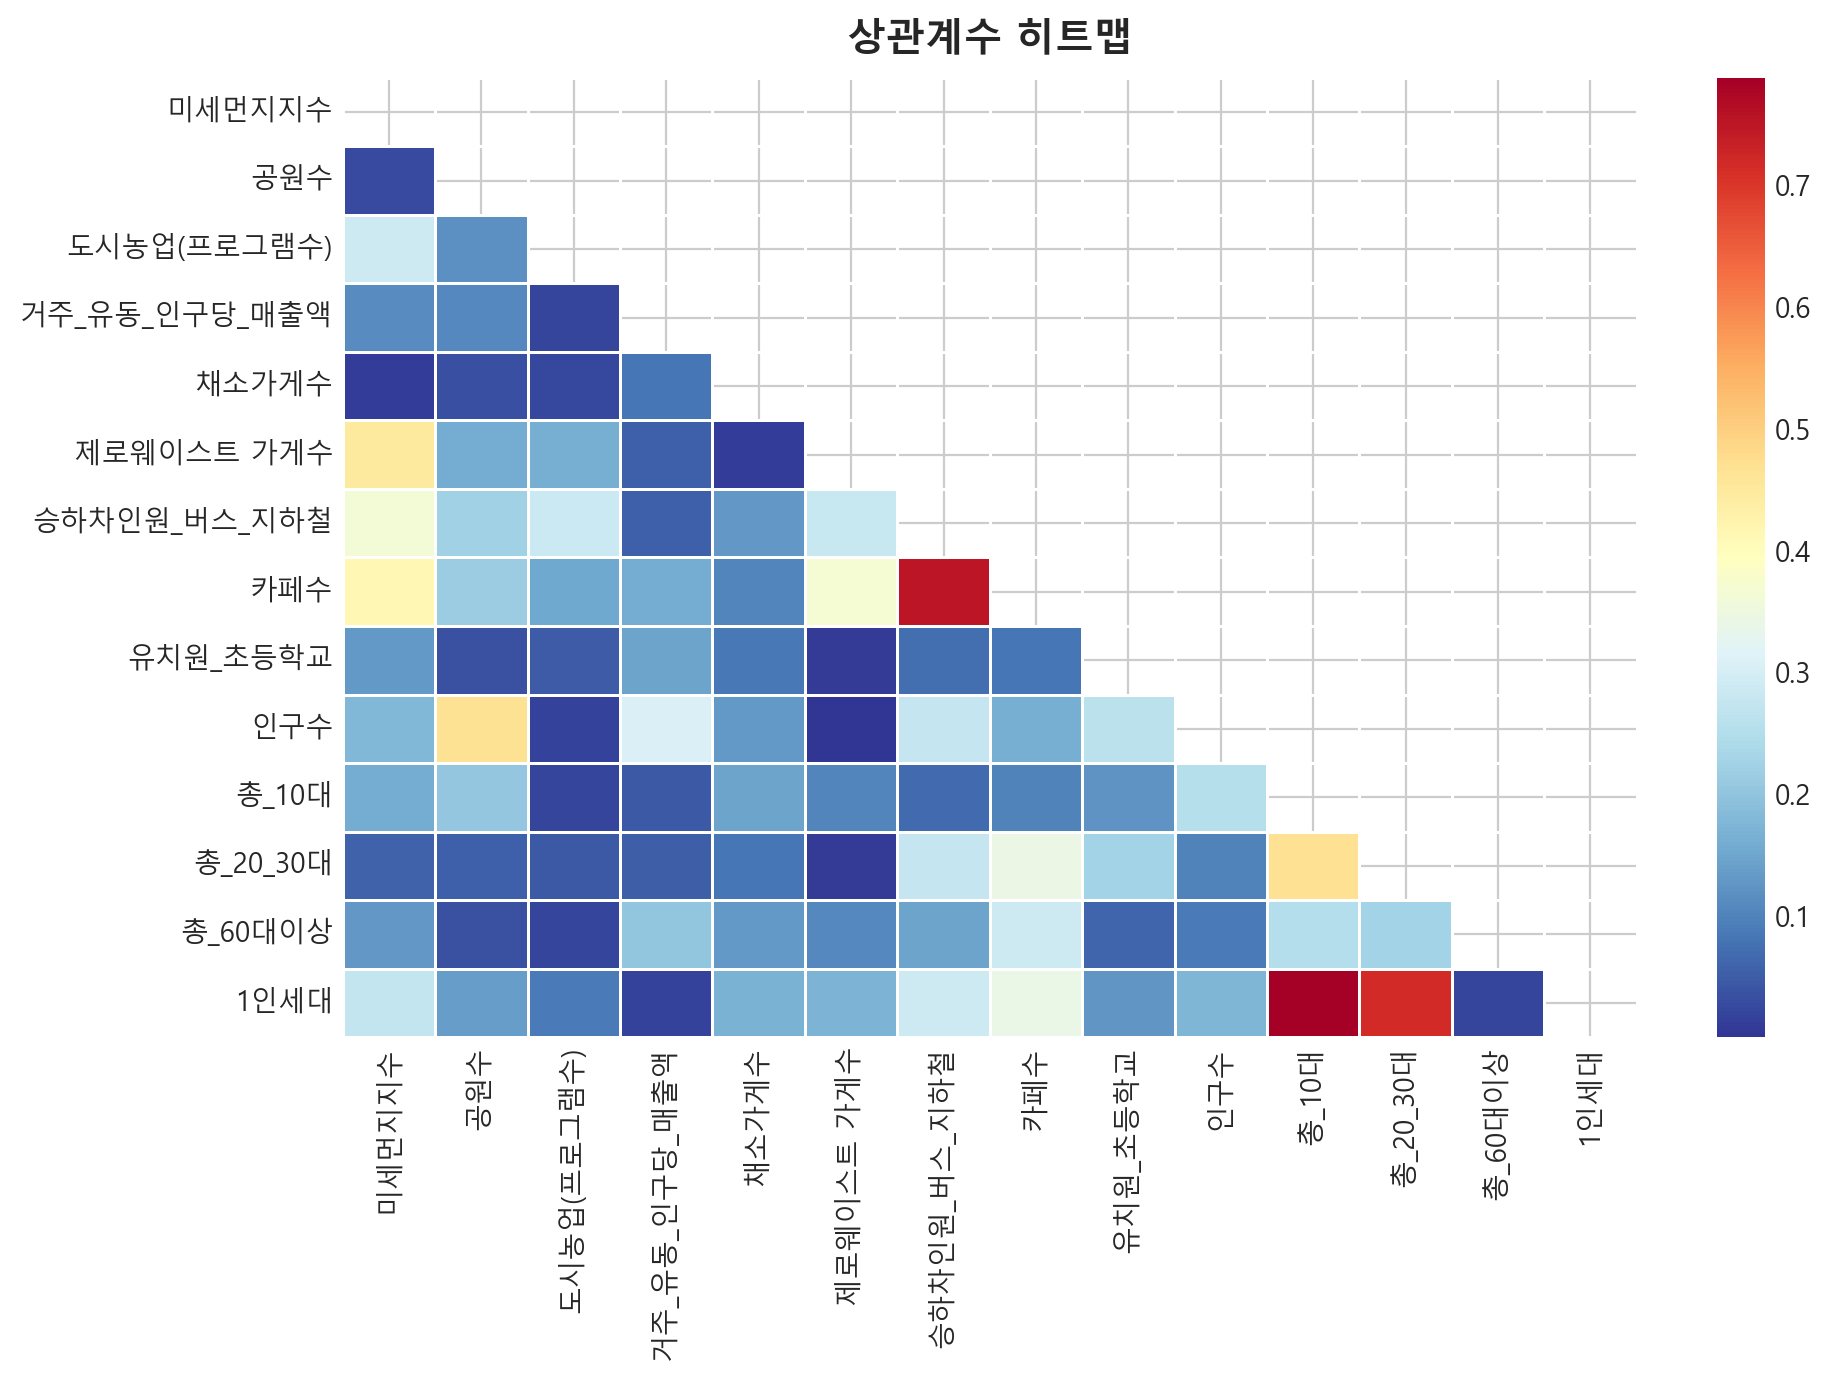

In [65]:
plt.figure(figsize = (10, 7))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(data[features].corr().apply(lambda x : abs(x)), dtype=bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = data[features].corr().apply(lambda x : abs(x)),    # 'corr' = 상관계수 테이블
            annot = False,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

In [49]:
for k, v in data.corr().apply(lambda x : abs(x)).to_dict().items():
    for k2, v2, in v.items():
        if v2 < 0.1:
            print(k, k2, v2)

2023년09월_전체세대 제로웨이스트 가게수 0.012125195835080498
2023년09월_전체세대 미세먼지백분위 0.09366563613078467
2023년09월_전체세대 공원율 0.0041053041757379
2023년09월_전체세대 도시농업(프로그램수) 0.04205145961484398
2023년09월_전체세대 도시농업(시설수) 0.08763458376413015
2023년09월_전체세대 1_기타 0.07797865066573044
2023년09월_전체세대 2_기타 0.08637293389240425
2023년09월_전체세대 1점포당_1년_매출액 0.012917337609913418
2023년09월_전체세대 행정동별_1년_매출액 0.05357547719555418
2023년09월_전체세대 총_10대 0.016427509789842268
2023년09월_전체세대 총_40_50대 0.07657945345205053
2023년09월_전체세대 총_60대이상 0.09630727823562697
2023년09월_1인세대 2023년09월_4인세대 0.006373840193680995
2023년09월_1인세대 2023년09월_5인세대 0.05063430082072229
2023년09월_1인세대 2023년9월_6인가구이상 0.09755489367488071
2023년09월_1인세대 제로웨이스트 가게수 0.058687607880078874
2023년09월_1인세대 미세먼지지수 0.03124679206339666
2023년09월_1인세대 미세먼지백분위 0.009129262533463342
2023년09월_1인세대 공원율 0.03397026245442697
2023년09월_1인세대 도시농업(프로그램수) 0.06315234706370951
2023년09월_1인세대 도시농업(시설수) 0.07062213874633941
2023년09월_1인세대 초등학교수 0.05798813502164555
2023년09월_1인세대 1_0대 0.04566898499264973
2023년